In [2]:
#importing the librariers to create the model

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

Using TensorFlow backend.
C:\Users\Kishan\Anaconda3\envs\dogcat_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kishan\Anaconda3\envs\dogcat_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kishan\Anaconda3\envs\dogcat_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Us

In [2]:
#creating a pipleline sequential

image_classifier = Sequential()

In [3]:
#creating a convolution layer and setting the kernels

image_classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [4]:
#creating a pooling layers
image_classifier.add(MaxPooling2D(pool_size=(3,3)))

In [5]:
#Flattening the convoluted data

image_classifier.add(Flatten())

In [6]:
#adding neural network

image_classifier.add(Dense(units=64,activation='softmax'))
image_classifier.add(Dense(units=3,activation='softmax'))

In [7]:
#compling the CNN
image_classifier.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
import tensorflow as tf
#tf.keras.losses.categorical_crossentropy
#tf.keras.optimizers.

In [9]:
#Fitting tghe CNN to images
from keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
#tf.keras.losses.categorical_crossentropy
#tf.keras.optimizers. This is how you can check the loss and optimizer and activation function available iwth name

In [11]:
#creating the dataset
training_set= train_datagen.flow_from_directory(r'F:\images_CNN',target_size=(64,64),batch_size=32,class_mode='categorical')
test_set= test_datagen.flow_from_directory(r'F:\images_CNN',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 33 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [ ]:
image_classify_model= image_classifier.fit_generator(training_set,steps_per_epoch=800,epochs=2,validation_data=test_set,validation_steps=200)

Epoch 1/2


C:\Users\Kishan\Anaconda3\envs\dogcat_test\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


262/800 [========>.....................] - ETA: 1:59:02 - loss: 0.0592 - accuracy: 1.0000

In [24]:
image_classifier.save("image_classify_model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
training_set.class_indices

{'Baby': 0, 'Kishan': 1, 'Rakesh': 2}

In [18]:
image_classify_model.params

{'epochs': 2,
 'steps': 800,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [35]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
test_image= image.load_img(r'F:\Gujrat trop\IMG_20190219_112645.jpg',target_size=(64,64))
test_image= image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=load_model("image_classify_model.h5")
result=model.predict_proba(test_image)
if np.argmax(result[0]) == 0:
    print("its baby")
elif np.argmax(result[0]) == 1:
    print("Its Kishan")
else:
    print("its Rakesh")


its Rakesh


In [36]:
result

array([[0.03380242, 0.02803168, 0.93816584]], dtype=float32)

In [19]:
import numpy as np

nn=np.load(r'C:/Users/Kishan/Downloads/conv2d_1_kernel_0 (1).npy')

In [20]:
nn[0][0]

array([[-0.12050168,  0.03848144, -0.11384341, -0.08852763, -0.00787206,
         0.15771195, -0.01851995, -0.09459576,  0.09650394,  0.12857354,
        -0.02361998, -0.07557377, -0.01236992,  0.025731  , -0.10494816,
        -0.05806601, -0.050201  , -0.10117855, -0.13493995,  0.06230396,
        -0.05232795, -0.02253981,  0.04285239,  0.10415566, -0.18098663,
         0.06549856, -0.05211704, -0.10665832, -0.1207348 , -0.09216708,
         0.10079101, -0.02211122],
       [ 0.0377595 , -0.09808479,  0.06306689, -0.036848  ,  0.01040586,
         0.10216539, -0.08481596,  0.13378517,  0.03966426,  0.0148929 ,
        -0.12681775,  0.11465637, -0.06648129, -0.04459801,  0.11473614,
         0.01414053,  0.05510355, -0.12543698, -0.1297576 , -0.07653151,
        -0.03219608, -0.07224974, -0.08421243,  0.01752902, -0.15432309,
        -0.0294784 ,  0.03504584,  0.1031573 ,  0.09856116,  0.12516576,
        -0.13113822, -0.09152312],
       [-0.02174964, -0.10228779, -0.10854736,  0.1258

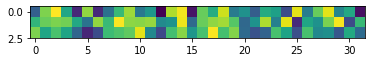

In [33]:
from matplotlib import pyplot as plt
for n in range(2):
    plt.imshow(nn[n][2])